# EDA sobre los datos de Lihth Duty Vehicles (Autos Ligeros):

Datos proporcionados por Henry, se desconoce la fuente original pero podría ser los [datos](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/476872f0-cc09-42d1-a9d3-9fab9ffde53c) abiertos de canadá.

Porporciona datos de los diferentes vehículos ligeros, ingeniería, consumo de combustible, emisión de CO2 y eficiencia.

### 1. Importar librerías:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Abrir y Explorar Archivos:

In [3]:
df_LDVehicles = pd.read_csv('../Datasets/Light Duty Vehicles.csv')

In [10]:
df_LDVehicles.head(-3)

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,648,49,5.0,219,27,Taurus FFV,1993,14.0,19.0,NaN,...,https://www.ford.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3001,652,3,1.0,215,25,Chevy Pickup C-2500,1992,NaN,NaN,NaN,...,http://www.chevrolet.com,Pickup,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN
3002,651,11,5.0,215,27,Lumina FFV,1992,NaN,NaN,NaN,...,http://www.chevrolet.com,Sedan/Wagon,E85_GSLN,Ethanol (E85),Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3003,656,3,1.0,225,9,Ram Van B250,1992,NaN,NaN,NaN,...,http://www.dodge.com,Van,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN


Contenido cantidad y tipo de datos:

In [5]:
df_LDVehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

### 2. Valores Nulos:

In [6]:
df_LDVehicles.isna().sum()

Vehicle ID                               0
Fuel ID                                  0
Fuel Configuration ID                   35
Manufacturer ID                          0
Category ID                              0
Model                                    0
Model Year                               0
Alternative Fuel Economy City         1413
Alternative Fuel Economy Highway      1503
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy City         964
Conventional Fuel Economy Highway      962
Conventional Fuel Economy Combined    2245
Transmission Type                       86
Engine Type                            797
Engine Size                            134
Engine Cylinder Count                  565
Engine Description                    1037
Manufacturer                             0
Manufacturer URL                       164
Category                                 0
Fuel Code                                0
Fuel                                     0
Fuel Config

Algunos datoa nulos son justificados en que no deben existir, por ejemplo en vehículos eléctricos no debe tener datos en las columnas dodnde solo existen para convencionales. las dimensiones de interés tales como "Fuel Configuration Name, Fuel, Engine Type; tienen nulos poco significativos y podría usarse el data set para comparar el consumo entre diferentes vehículos con diferentes tipo de combustible.

### 3. Valores dulpicados:

In [22]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_LDVehicles.duplicated())
print("Hay un total de ",duplicates_count," duplicados en Ligth Duty Vehicles")

Hay un total de  0  duplicados en Ligth Duty Vehicles


### 4. Búsqueda de Outliers:

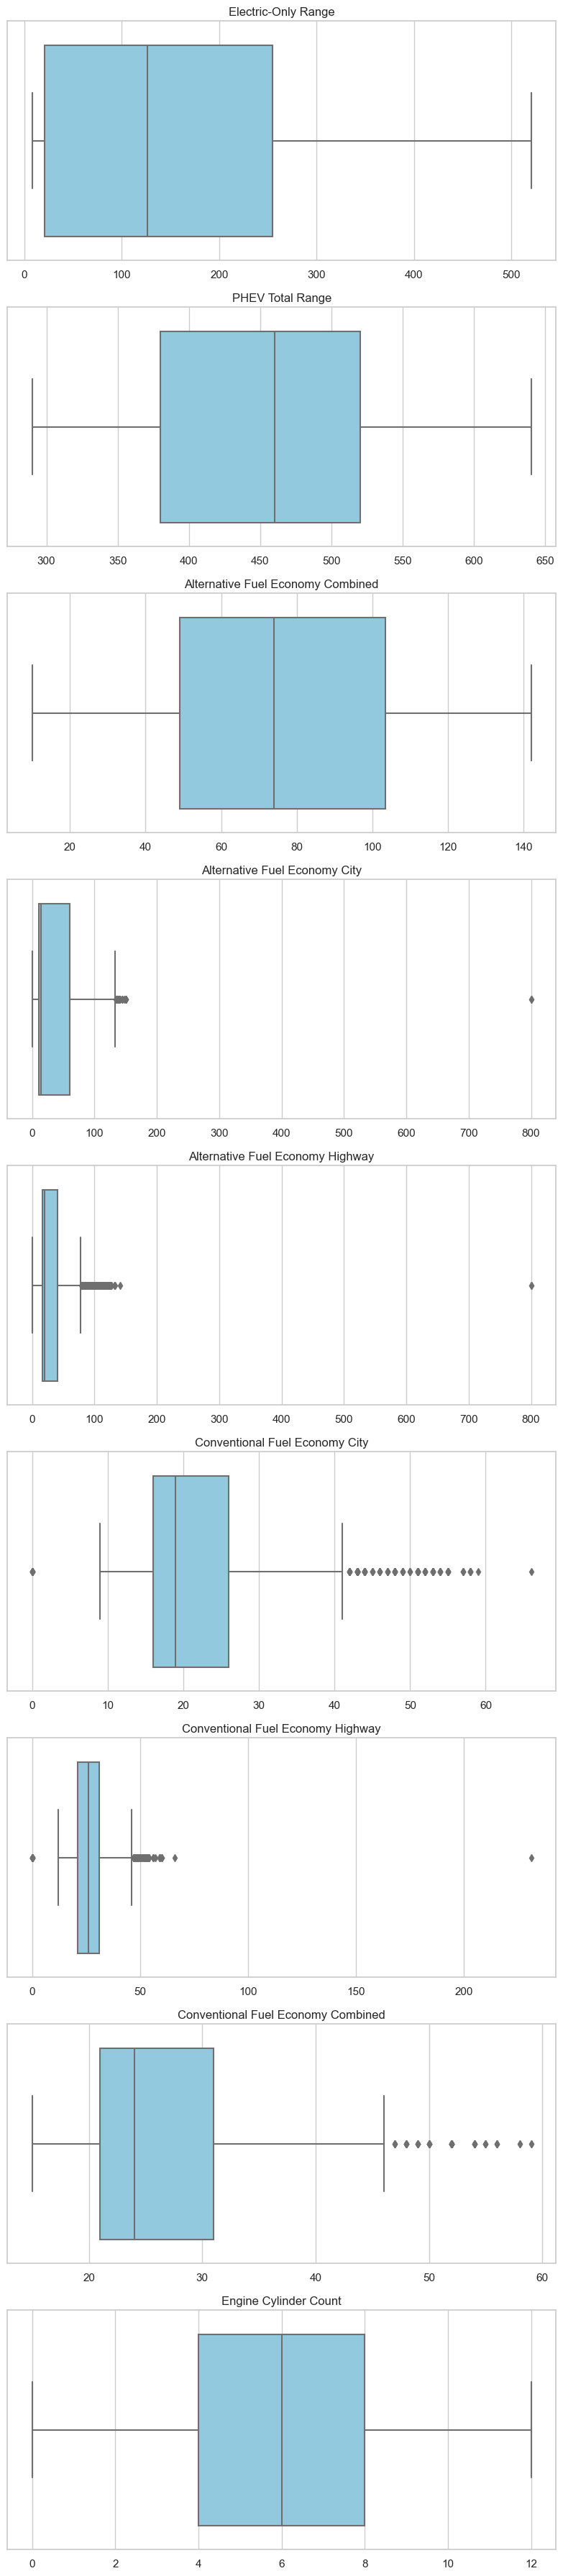

In [20]:
# Selecciona solo las columnas numéricas
df_numerical = df_LDVehicles.select_dtypes(include='number')

# Elimina los valores nulos y los valores cero específicamente para todas las columnas numéricas
df_filtered = df_numerical[['Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Engine Cylinder Count',
       'Electric-Only Range','PHEV Total Range']]


# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_filtered.quantile(0.75) - df_filtered.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_filtered de acuerdo con el orden de iqr_values
df_filtered = df_filtered[sorted_columns]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja utilizando Seaborn
plt.figure(figsize=(8, 4*len(sorted_columns)))
for i, column in enumerate(sorted_columns):
    plt.subplot(len(sorted_columns), 1, i+1)  # Subtrama para cada variable
    sns.boxplot(x=df_filtered[column], color='skyblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


Podemos observar que exitsten Outliers en cuanto a la autonomía del vehículo principalmente. Lo que puede ser usado a la hora de elegir un vehículo híbrido o elécttrtico.

### 5. Descripción las columnas:

In [7]:
df_LDVehicles.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Cylinder Count',
       'Engine Description', 'Manufacturer', 'Manufacturer URL', 'Category',
       'Fuel Code', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range',
       'PHEV Total Range', 'PHEV Type', 'Notes', 'Drivetrain'],
      dtype='object')

- 'Electric-Only Range': Rango Únicamente Eléctrico

Explicación: Esta columna indica el alcance o la distancia máxima que un vehículo eléctrico puede recorrer únicamente con su sistema de propulsión eléctrica, sin depender de combustibles líquidos. Especifica la distancia que el vehículo puede recorrer en modo completamente eléctrico antes de que sea necesario utilizar un combustible adicional o un extensor de rango.

- 'PHEV Total Range': Rango Total de PHEV (Vehículo Eléctrico con Extensor de Rango)

Explicación: Para los vehículos híbridos enchufables (PHEV, por sus siglas en inglés) que tienen la capacidad de utilizar tanto electricidad como combustible convencional, esta columna indica el rango total que el vehículo puede recorrer antes de necesitar recargar la batería o depender completamente del combustible convencional. Incluye tanto el rango eléctrico como el rango que se puede lograr con el uso de combustible.

- 'PHEV Type': Tipo de PHEV

Explicación: Indica el tipo específico de vehículo híbrido enchufable (PHEV). Puede proporcionar información sobre la configuración del sistema de propulsión, la capacidad de la batería y otros detalles distintivos del modelo de vehículo PHEV.

- 'Drivetrain': Tren de Potencia (o Tipo de Transmisión y Tracción)

Explicación: Indica el tipo de tren de potencia que tiene el vehículo, lo cual se refiere a cómo se transmite la potencia del motor a las ruedas. Puede incluir detalles sobre el tipo de transmisión (manual, automática, CVT, etc.) y el tipo de tracción (delantera, trasera, integral, etc.).

Economía de Combustible para Combustibles Convencionales:

Ejemplos: Gasolina, diésel.
Descripción: La categoría "Convencional" se refiere a vehículos que utilizan combustibles tradicionales, como gasolina o diésel, como su principal fuente de energía. Estos vehículos pueden tener motores de combustión interna convencionales y no están equipados con tecnologías de propulsión alternativas, como la electricidad o el hidrógeno.
Economía de Combustible para Combustibles Alternativos:

Ejemplos: Eléctrico, híbrido, vehículos a gas natural, vehículos a hidrógeno.
Descripción: La categoría "Alternativo" se refiere a vehículos que utilizan fuentes de energía alternativas a los combustibles fósiles tradicionales. Esto puede incluir vehículos eléctricos (que utilizan baterías eléctricas), vehículos híbridos (que combinan un motor de combustión interna con un motor eléctrico), vehículos a gas natural comprimido (CNG), vehículos a hidrógeno y otros. Estos vehículos suelen tener tecnologías más avanzadas y pueden ofrecer una mayor eficiencia energética y menores emisiones de gases contaminantes.

### 6. Descripción de los valores de las columnas:

Tipo de Combustibles:

In [5]:
df_LDVehicles['Fuel'].unique()

array(['Hybrid Electric', 'Plug-in Hybrid Electric', 'Electric',
       'Biodiesel (B20)', 'Ethanol (E85)', 'Hydrogen Fuel Cell',
       'Propane - Bi-fuel', 'CNG - Bi-fuel',
       'CNG - Compressed Natural Gas', 'Propane', 'Methanol'],
      dtype=object)

- 'Hybrid Electric': Híbrido Eléctrico
- 'Plug-in Hybrid Electric': Híbrido Enchufable
- 'Electric': Eléctrico
- 'Biodiesel (B20)': Biodiésel (B20)
- 'Ethanol (E85)': Etanol (E85)
- 'Hydrogen Fuel Cell': Célula de Combustible de Hidrógeno
- 'Propane - Bi-fuel': Propano - Bi-Fuel (bifuel)
- 'CNG - Bi-fuel': Gas Natural Comprimido (GNC) - Bi-Fuel (bifuel)
- 'CNG - Compressed Natural Gas': Gas Natural Comprimido (GNC) - Gas Natural Comprimido
- 'Propane': Propano
- 'Methanol': Metanol

### 8. Decripción destadística de los datos:

In [21]:
df_LDVehicles.describe()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count,Electric-Only Range,PHEV Total Range
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008.000000,1595.000000,1505.000000,467.000000,2044.000000,2046.000000,763.000000,2443.000000,374.000000,43.000000
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,2014.493019,38.439298,37.392651,72.126338,22.781605,27.443206,27.832241,6.085960,148.251337,450.465116
std,4667.98027,18.311570,3.263154,64.474477,6.021677,6.722191,47.778798,42.724296,36.776309,10.794132,10.123663,10.265666,1.762977,128.708353,93.042578
min,1.00000,3.000000,1.000000,209.000000,3.000000,1991.000000,0.000000,0.000000,10.000000,0.000000,0.000000,15.000000,0.000000,8.000000,290.000000
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,2012.000000,11.000000,16.000000,49.000000,16.000000,21.000000,21.000000,4.000000,21.000000,380.000000
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,2016.000000,14.000000,20.000000,74.000000,19.000000,26.000000,24.000000,6.000000,126.000000,460.000000
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,2020.000000,60.000000,41.000000,103.500000,26.000000,31.000000,31.000000,8.000000,254.750000,520.000000
max,13105.00000,57.000000,9.000000,470.000000,29.000000,2022.000000,800.000000,800.000000,142.000000,66.000000,231.000000,59.000000,12.000000,520.000000,640.000000


***De estos datos vale la pena extraer el consumo de conmbustible convencional y alternativo por tipo de vehículo, para tenerlo presente a la hora de elegir el tipo de vehículo eléctrico a introducir en el mercado.***